
# **ECSE  415 Assignment 1**
#Melis Malki - 260775809
##October 2, 2020

##**Initialization**

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**1 Thresholding**


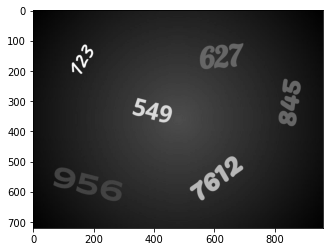

In [2]:
#Threshold values
threshold_1 = 55
threshold_2 = 90
threshold_3 = 150

# Read the "numbers.jpg"
numbers = mpimg.imread('/content/drive/My Drive/ECSE 415/numbers.jpg')
plt.imshow(numbers)

#Convert the image into grey scale
numbers_gray = cv2.cvtColor(numbers, cv2.COLOR_RGB2GRAY)

#Display
plt.imshow(numbers_gray, cmap='gray')


### Simple Binary Thresholding



Simple Binary Thresholding


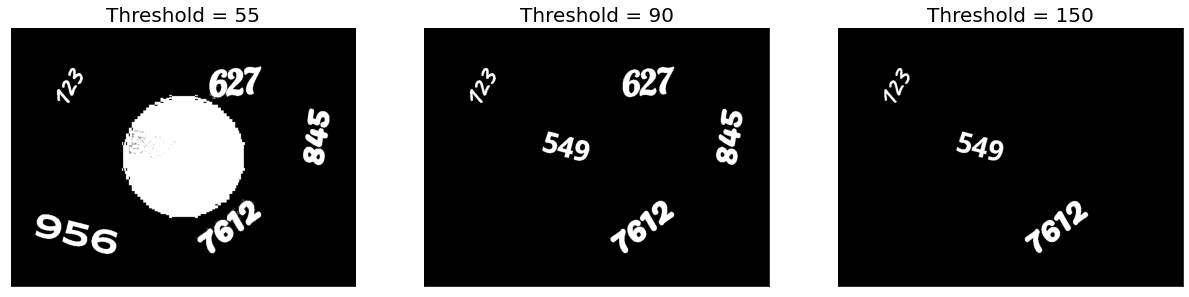

In [3]:
#Simple Binary Thresholding
simple_binary_t1 = np.where(numbers_gray > threshold_1, 255,0) 
simple_binary_t2= np.where(numbers_gray > threshold_2, 255,0) 
simple_binary_t3 = np.where(numbers_gray > threshold_3, 255,0) 

#Display
plt.figure(figsize=(21,21))
print('Simple Binary Thresholding')
plt.subplot(131), plt.imshow(simple_binary_t1, cmap="gray")
plt.title("Threshold = 55", fontsize=20), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(simple_binary_t2, cmap="gray")
plt.title("Threshold = 90",fontsize=20), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(simple_binary_t3, cmap="gray")
plt.title("Threshold = 150",fontsize=20), plt.xticks([]), plt.yticks([])
plt.show()


**Simple Binary Threshold Analysis**

When the image threshold at 55, all the numbers except "549" are segmented. The number "549" has a higher intensity than the threshold however the lighter part of the background has a higher intensity than the threshold as well and, it causes a noisy white circle which covers the number "549". 

When the image threshold at 90, only the number of "956" cannot be segmented because its intensity is less than the threshold.

When the image threshold at 150, only three numbers (123,549,7612) are segmented. Other numbers (956,627,845) have a too low intensity to be considered as foreground.



### Inverse Binary Thresholding



Inverse Binary Thresholding


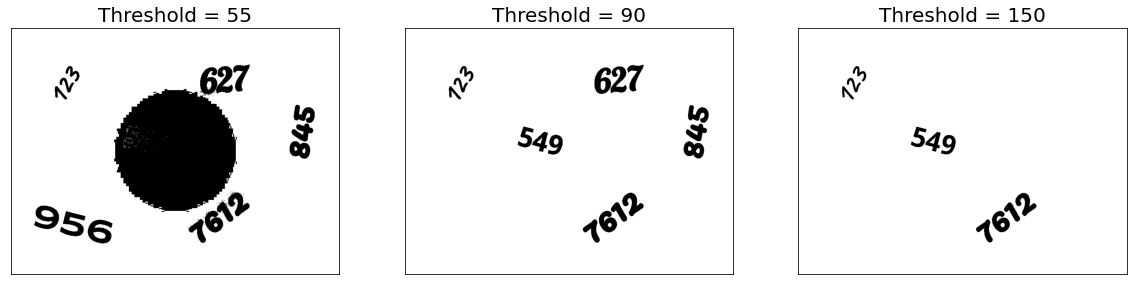

In [4]:
#Inverse Binary Thresholding
inverse_binary_t1 = np.where(numbers_gray < threshold_1, 255,0)
inverse_binary_t2 = np.where(numbers_gray < threshold_2, 255,0)
inverse_binary_t3 = np.where(numbers_gray < threshold_3, 255,0)

#Display
plt.figure(figsize=(20,20))
print('Inverse Binary Thresholding')
plt.subplot(131), plt.imshow(inverse_binary_t1, cmap="gray")
plt.title("Threshold = 55", fontsize=20), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(inverse_binary_t2, cmap="gray")
plt.title("Threshold = 90",fontsize=20), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(inverse_binary_t3, cmap="gray")
plt.title("Threshold = 150",fontsize=20), plt.xticks([]), plt.yticks([])
plt.show()


**Inverse Binary Threshold Analysis**

The inverse binary threshold can be described as the reciprocal of the simple binary threshold. The results are the same except the white parts in a simple binary threshold is black in inverse binary threshold and vice versa.

When the image threshold at 55, only the number "549" cannot be seen in the image. Since the lighter part of the background has a higher intensity than the threshold, it causes a noisy black circle.

When the image threshold at 90, only the number of "956" is not segmented.

When the image threshold at 150, only three numbers (123,549,7612) are segmented. Other numbers (956,627,845) have a lower intensity as the background and cannot be differentiated.

### Window Binary Thresholding



Window Binary Thresholding


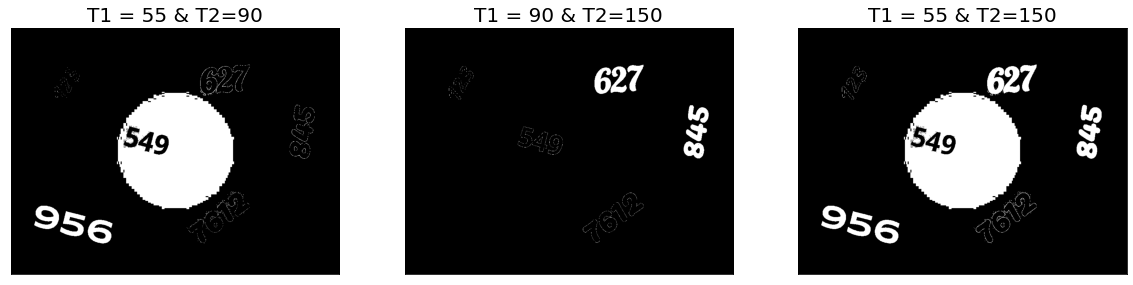

In [5]:
#Window Binary Thresholding
window_binary_t1t2 = np.where(np.logical_and(threshold_1< numbers_gray,numbers_gray<threshold_2),255,0)
window_binary_t2t3 = np.where(np.logical_and(threshold_2< numbers_gray,numbers_gray<threshold_3),255,0)
window_binary_t1t3 = np.where(np.logical_and(threshold_1< numbers_gray,numbers_gray<threshold_3),255,0)

#Display
plt.figure(figsize=(20,20))
print('Window Binary Thresholding')
plt.subplot(131), plt.imshow(window_binary_t1t2, cmap="gray")
plt.title("T1 = 55 & T2=90", fontsize=20), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(window_binary_t2t3, cmap="gray")
plt.title("T1 = 90 & T2=150",fontsize=20), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(window_binary_t1t3, cmap="gray")
plt.title("T1 = 55 & T2=150",fontsize=20), plt.xticks([]), plt.yticks([])
plt.show()

**Window Binary Threshold Analysis**

When the image threshold at between 55 and 90, the number "956" is segmented. 
The lighter part of the background is segmented as well, and it helps to differentiate non-segmented number "549".

When the image threshold at between 90 and 150, the number "845" and "627" are segmented. These are the numbers in which their boundaries are differentiable in the threshold between 55 and 90.

When the image threshold at between 55 and 150, all the segmented numbers (956,845,627) in previous cases are segmented again since this case covers both previous cases. 

The numbers "123", "549" and "7612" are not segmented in any cases because their intensities are not in the range of 55 to 150,  and their intensities are higher than 150 as it is shown in simple binary threshold analysis.

### Threshold to obtain "123" and "549"

First Step : Narrow the range


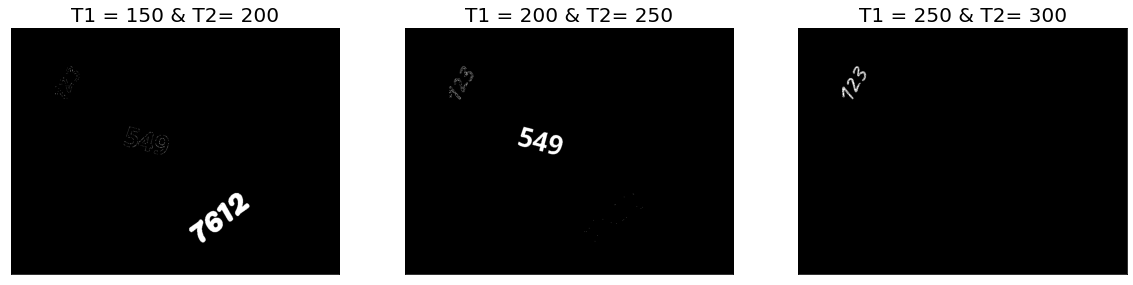

In [6]:
"First step: narrow the range"
range_1 = np.where(np.logical_and(150< numbers_gray,numbers_gray<200),255,0)
range_2 = np.where(np.logical_and(200< numbers_gray,numbers_gray<250),255,0)
range_3 = np.where(np.logical_and(250< numbers_gray,numbers_gray<300),255,0)

#Display
plt.figure(figsize=(20,20))
print("First Step : Narrow the range")
plt.subplot(131), plt.imshow(range_1, cmap="gray")
plt.title("T1 = 150 & T2= 200", fontsize=20), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(range_2, cmap="gray")
plt.title("T1 = 200 & T2= 250",fontsize=20), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(range_3, cmap="gray")
plt.title("T1 = 250 & T2= 300",fontsize=20), plt.xticks([]), plt.yticks([])
plt.show()

Second Step : Find lower bound


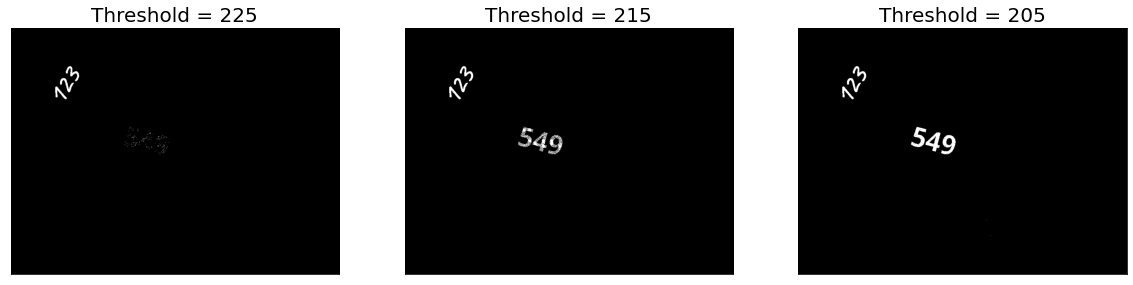

In [7]:
"Second step: find the lower bound"
lower_bound_1 = np.where(225 < numbers_gray, 255,0)
lower_bound_2 = np.where(215 < numbers_gray, 255,0)
lower_bound_3 = np.where(205 < numbers_gray, 255,0)

#Display
plt.figure(figsize=(20,20))
print("Second Step : Find lower bound")
plt.subplot(131), plt.imshow(lower_bound_1, cmap="gray")
plt.title("Threshold = 225",fontsize=20), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(lower_bound_2, cmap="gray")
plt.title("Threshold = 215",fontsize=20), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(lower_bound_3, cmap="gray")
plt.title("Threshold = 205",fontsize=20), plt.xticks([]), plt.yticks([])

plt.show()

Third step: Three different threshold values


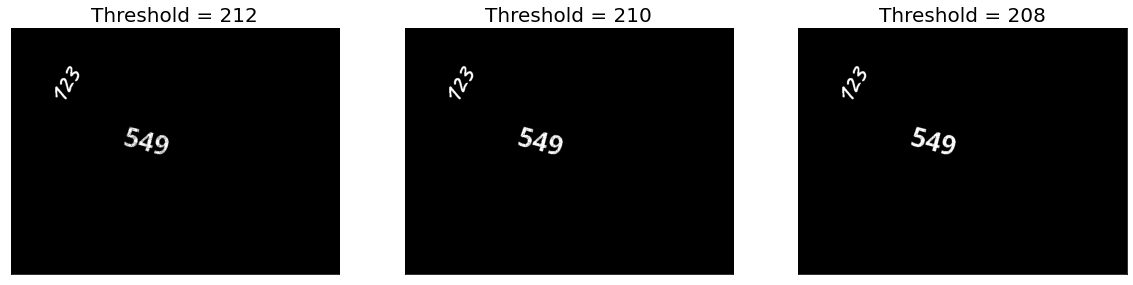

In [8]:
"Third step: Three different threshold values"
test_1 = np.where(212 < numbers_gray, 255,0)
test_2 = np.where(210 < numbers_gray, 255,0)
test_3 = np.where(208 < numbers_gray, 255,0)

#Display
plt.figure(figsize=(20,20))
print("Third step: Three different threshold values")
plt.subplot(131), plt.imshow(test_1, cmap="gray")
plt.title("Threshold = 212",fontsize=20), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(test_2, cmap="gray")
plt.title("Threshold = 210",fontsize=20), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(test_3, cmap="gray")
plt.title("Threshold = 208",fontsize=20), plt.xticks([]), plt.yticks([])

plt.show()

**The process of segmenting the requested numbers**


In the previous simple binary analysis, the requested numbers "123" and "549" are segmented when the threshold is 150. It shows that the numbers' intensities are higher than 150. The previous window binary analysis proves this argument since non of the requested numbers are segmented in the threshold range of 55 and 150. To narrow the range of their not know intensities, I used window binary threshold as a first step.

The first range is between 150 and 200, the second range is between 200 and 250 and the last range is between 250 and 300. In the first range non of them are segmented. In the second range, "123" is half segmented, and "549" is fully segmented. In the last range, only "123" is segmented. Thus, this step shows that the number "549" has an intensity between 200 and 250 and the number "123" has an intensity bigger than "549".

I used a simple binary threshold at 225, 215, and 205 as the second step to narrow the possibilities for the number "549" intensity. At threshold 225, only the number "123" is segmented. At threshold 215, the number "123" is segmented again and the number "549" is almost segmented. At threshold 205, both numbers are segmented. This step shows that any threshold value smaller than 215 will result as both requested numbers are segmented.

As a third step, the simple binary threshold at 212 and 210 and 208 are tested shown as sample thread values to segment the requested numbers.

##**2 Denoising**

### Filter Image with Gaussian Noise

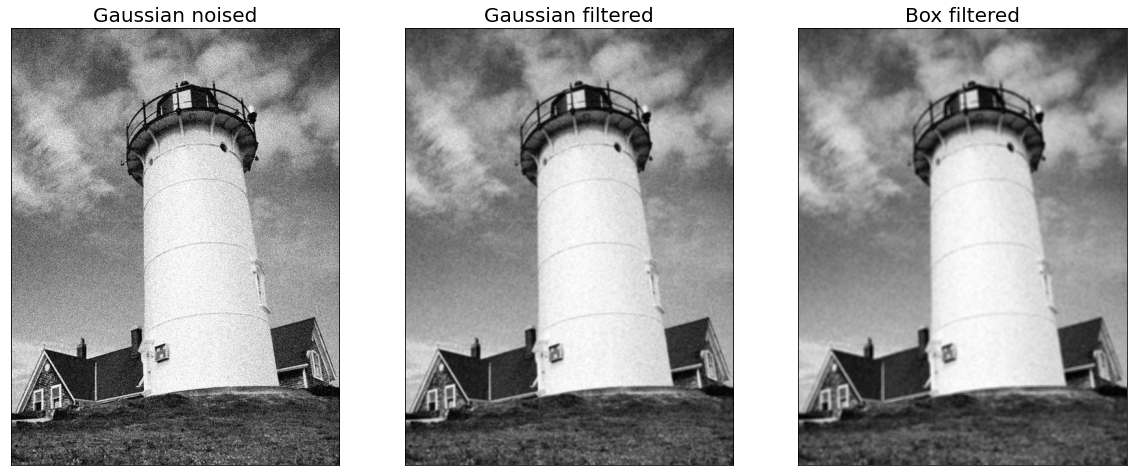

In [9]:
# Read the Gaussian noised lighthouse
lighthouse_gaussian_noised = mpimg.imread('/content/drive/My Drive/ECSE 415/gaussian_lighthouse.png')

#Convert the image into grey scale
lighthouse_gaussian_noised_gray = cv2.cvtColor(lighthouse_gaussian_noised, cv2.COLOR_RGB2GRAY)

#5X5 Gaussian Filter
lighthouse_gaussian_filtered = cv2.GaussianBlur(lighthouse_gaussian_noised_gray,(5,5),0)

#Box Filter
lighthouse_box_filtered=cv2.blur(lighthouse_gaussian_noised_gray,(5,5))

#Display
plt.figure(figsize=(20,20))
plt.subplot(131), plt.imshow(lighthouse_gaussian_noised_gray, cmap="gray")
plt.title("Gaussian noised",fontsize=20), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(lighthouse_gaussian_filtered, cmap="gray")
plt.title("Gaussian filtered",fontsize=20), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(lighthouse_box_filtered, cmap="gray")
plt.title("Box filtered",fontsize=20), plt.xticks([]), plt.yticks([])
plt.show()


####Peak-Signal-to-Noise-Ratio  (PSNR)

In [10]:
# Read in the original image
lighthouse = mpimg.imread('/content/drive/My Drive/ECSE 415/lighthouse.png')
#Convert the image into grey scale
lighthouse_gray = cv2.cvtColor(lighthouse, cv2.COLOR_RGB2GRAY)

print("PSNR of :")
print("- Gaussian Filter: " + str(cv2.PSNR(lighthouse_gray,lighthouse_gaussian_filtered)))
print("- Box Filter: " + str(cv2.PSNR(lighthouse_gray, lighthouse_box_filtered)))

PSNR of :
- Gaussian Filter: 75.70521977161447
- Box Filter: 73.43441578175603


**PSNR Analysis for Image with Gaussian Noise**

As is calculated above, the Gaussian filter has a higher PSNR value. It shows that the Gaussian filter was more successful in removing the noise compared to the box filter, and the filtered image is more similar to the clean version of the image.

### Filter Image with Salt and Pepper Noise

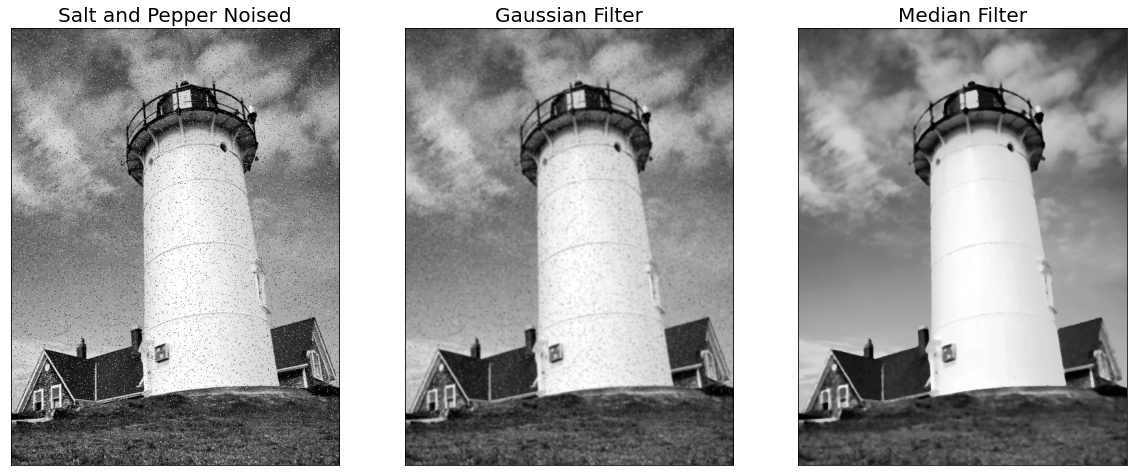

In [11]:
# Read the Salt and Pepper noised lighthouse image
lighthouse_sp_noised = mpimg.imread('/content/drive/My Drive/ECSE 415/saltandpepper_lighthouse.png')
#Convert the image into grey scale
lighthouse_sp_noised_gray = cv2.cvtColor(lighthouse_sp_noised, cv2.COLOR_RGB2GRAY)

#5X5 Gaussian Filter
lighthouse_sp_noised_gaussian_filtered = cv2.GaussianBlur(lighthouse_sp_noised_gray,(5,5),0)

#Median Filter
lighthouse_sp_noised_median_filtered = cv2.medianBlur(lighthouse_sp_noised_gray, 5)

#Display
plt.figure(figsize=(20,20))
plt.subplot(131), plt.imshow(lighthouse_sp_noised_gray, cmap="gray")
plt.title("Salt and Pepper Noised",fontsize=20), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(lighthouse_sp_noised_gaussian_filtered, cmap="gray")
plt.title("Gaussian Filter",fontsize=20), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(lighthouse_sp_noised_median_filtered, cmap="gray")
plt.title("Median Filter",fontsize=20), plt.xticks([]), plt.yticks([])
plt.show()

####Peak-Signal-to-Noise-Ratio  (PSNR)

In [12]:
print("PSNR of :")
print("- Gaussian Filter: " + str(cv2.PSNR(lighthouse_gray,lighthouse_sp_noised_gaussian_filtered)))
print("- Median Filter: " + str(cv2.PSNR(lighthouse_gray, lighthouse_sp_noised_median_filtered)))

PSNR of :
- Gaussian Filter: 74.93255978391977
- Median Filter: 74.94424072039679


**PSNR Analysis for Image with Salt and Pepper Noise**

As is calculated above, the PSNR values for both filters are almost the same. The PSNR value for the median filter is slightly higher than the Gaussian filter. Even the difference is around 0.01,  there is a distinguishable quality difference between both filtered images. The median filter results in a better and more similar picture with the original picture.

##**3 Sobel Edge Detector**

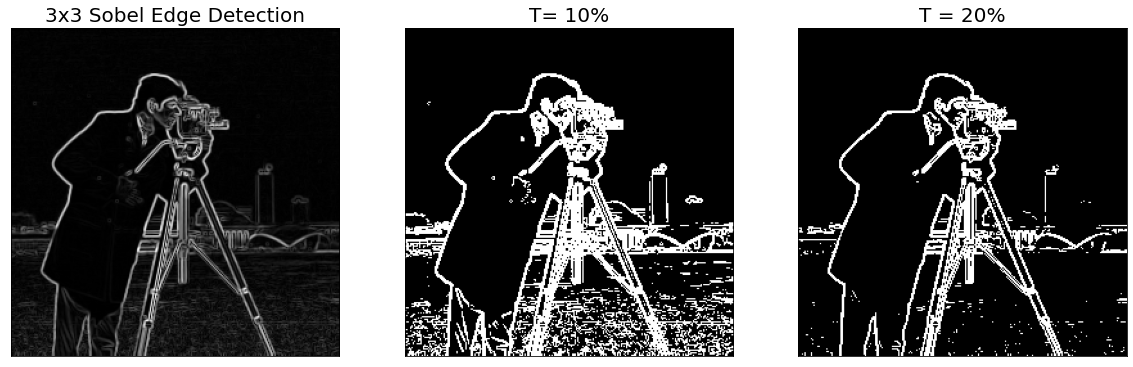

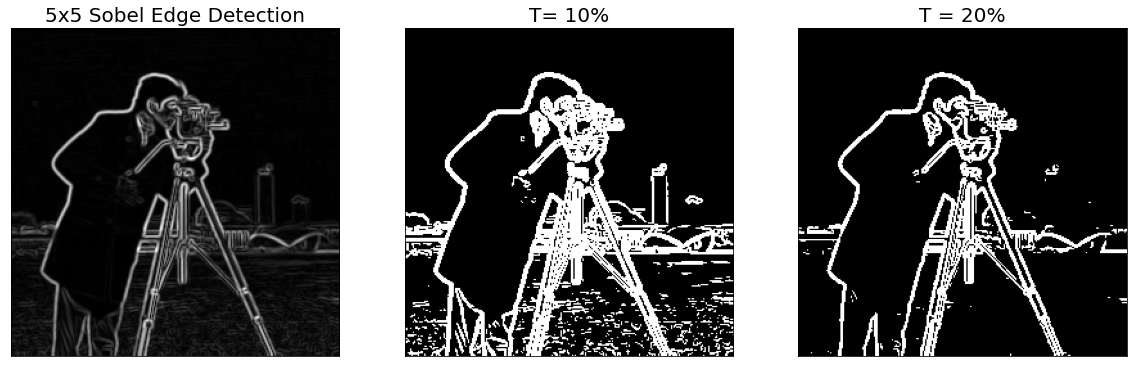

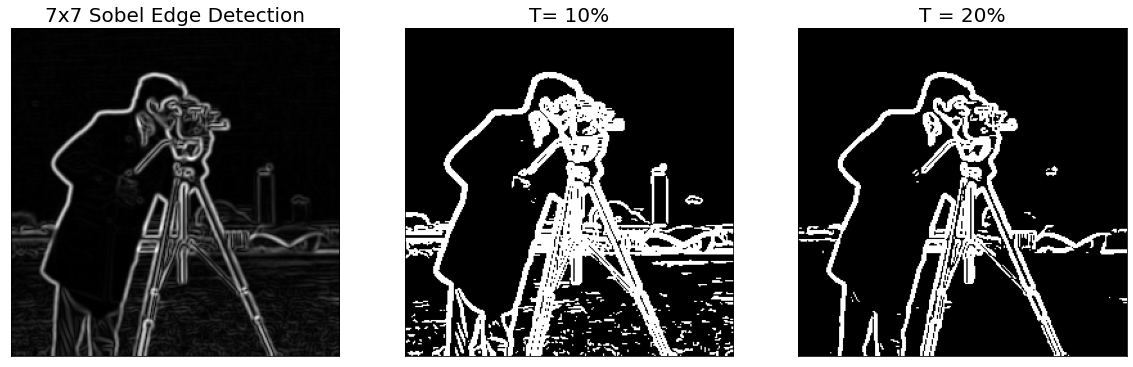

In [13]:
# Read the Cameraman Image
cameraman = mpimg.imread('/content/drive/My Drive/ECSE 415/cameraman.png')

K = [3,5,7]

for k in K:
  sobel_x = cv2.Sobel(cameraman,cv2.CV_64F,1,0,ksize=k)
  sobel_y = cv2.Sobel(cameraman,cv2.CV_64F,0,1,ksize=k)

  #Combine edges
  sobel_xy= cv2.magnitude(sobel_x,sobel_y) 
    
  ##Find Max Pixel Value
  sobel_max = np.amax(sobel_xy)

  #Threshold
  sobel_10t = np.where(sobel_xy > (sobel_max * 0.1),255,0)
  sobel_20t = np.where(sobel_xy > (sobel_max * 0.2),255,0)

  #Display
  plt.figure(figsize=(20,20))
  plt.subplot(131), plt.imshow(sobel_xy, cmap="gray")
  plt.title(f"{k}x{k} Sobel Edge Detection",fontsize=20), plt.xticks([]), plt.yticks([])
  plt.subplot(132), plt.imshow(sobel_10t, cmap="gray")
  plt.title("T= 10%",fontsize=20), plt.xticks([]), plt.yticks([])
  plt.subplot(133), plt.imshow(sobel_20t, cmap="gray")
  plt.title("T = 20%",fontsize=20), plt.xticks([]), plt.yticks([])
  plt.show()


**The effect of filter size on output**

As the kernel size decreases, more detailed edges are detected. As the kernel size decreases, ore clearer but less detailed edge detection occurs. It generally needs to be sized according to how much detailed edge detection is requested. It plays a significant role when we want to detect edges of a specific object in the image.

###Denoising Prior to Edge Detection

####Applying only Sobel Edge Detector

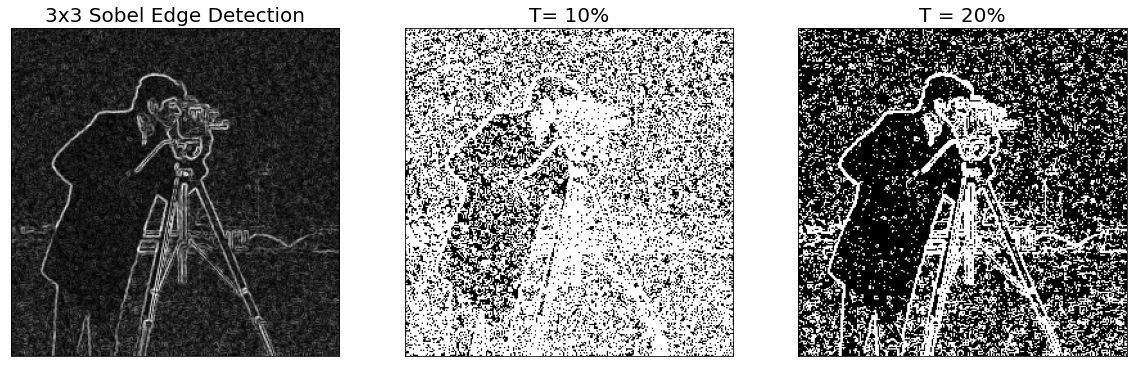

In [14]:
# Read in the Gaussian noised image
cameraman_gaussian = mpimg.imread('/content/drive/My Drive/ECSE 415/gaussian_cameraman.png')

#Sobel Edge Detection with kernel size = 3x3
cameraman_gaussian_x = cv2.Sobel(cameraman_gaussian,cv2.CV_64F,1,0,3)
cameraman_gaussian_y = cv2.Sobel(cameraman_gaussian,cv2.CV_64F,0,1,3)

##Combine edges
cameraman_gaussian_xy= cv2.magnitude(cameraman_gaussian_x,cameraman_gaussian_y)

##Find Max Pixel Value
cameraman_gaussian_max = int(np.amax(cameraman_gaussian_xy))

##Threshold
cameraman_gaussian_xy_10t = np.where(cameraman_gaussian_xy > (cameraman_gaussian_max * 0.1),255,0)
cameraman_gaussian_xy_20t = np.where(cameraman_gaussian_xy > (cameraman_gaussian_max * 0.2),255,0)

#Display
plt.figure(figsize=(20,20))
plt.subplot(131), plt.imshow(cameraman_gaussian_xy, cmap="gray")
plt.title("3x3 Sobel Edge Detection",fontsize=20), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(cameraman_gaussian_xy_10t, cmap="gray")
plt.title("T= 10%",fontsize=20), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(cameraman_gaussian_xy_20t, cmap="gray")
plt.title("T = 20%",fontsize=20), plt.xticks([]), plt.yticks([])
plt.show()



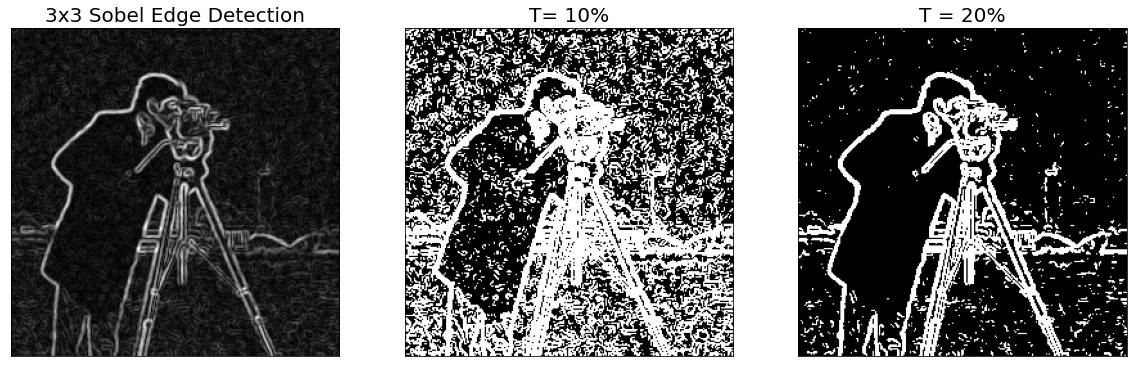

In [16]:
#Denoise
cameraman_denoised = cv2.blur(cameraman_gaussian,(3,3))

#Sobel edge detection with kernel size = 3x3
cameraman_denoised_x = cv2.Sobel(cameraman_denoised,cv2.CV_64F,1,0,3)
cameraman_denoised_y = cv2.Sobel(cameraman_denoised,cv2.CV_64F,0,1,3)

##Combine edges
cameraman_denoised_xy= cv2.magnitude(cameraman_denoised_x,cameraman_denoised_y)

##Find Max Pixel Value
cameraman_denoised_max = int(np.amax(cameraman_denoised_xy))

##Threshold
cameraman_denoised_xy_10t = np.where(cameraman_denoised_xy > (cameraman_denoised_max * 0.1),255,0)
cameraman_denoised_xy_20t = np.where(cameraman_denoised_xy > (cameraman_denoised_max * 0.2),255,0)

#Display
plt.figure(figsize=(20,20))
plt.subplot(131), plt.imshow(cameraman_denoised_xy, cmap="gray")
plt.title("3x3 Sobel Edge Detection",fontsize=20), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(cameraman_denoised_xy_10t, cmap="gray")
plt.title("T= 10%",fontsize=20), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(cameraman_denoised_xy_20t, cmap="gray")
plt.title("T = 20%",fontsize=20), plt.xticks([]), plt.yticks([])
plt.show()



**Effect of denoising prior edge detection**

Denoising is important for detecting the image edges correctly and avoiding detecting noise edges. After thresholding both denoised and not denoised images, the resulted images show that there are so many noise edges detected in the not denoised image that the edges of the original objects in the images are overlapping with the noise edges and it results in an unclear image.

##**4 Canny Edge Detection**

###4 Main Steps

1.   Filter image with x,y derivatives of Gaussian
2.   Find magnitude and orientation of the gradient
3.   Perform non-maximum suppression to avoid nonreal responses by thinning multi-pixel wide "ridges" down to single pixel width. 
4.   Perform hysteresis thresholding by defining low and high thresholds and use the high one to start edge curves and the low one to connect them


###Hyperparameters' Effect On Edge Detection

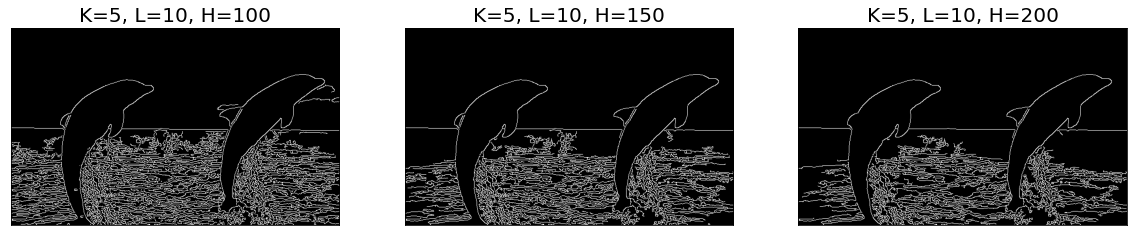

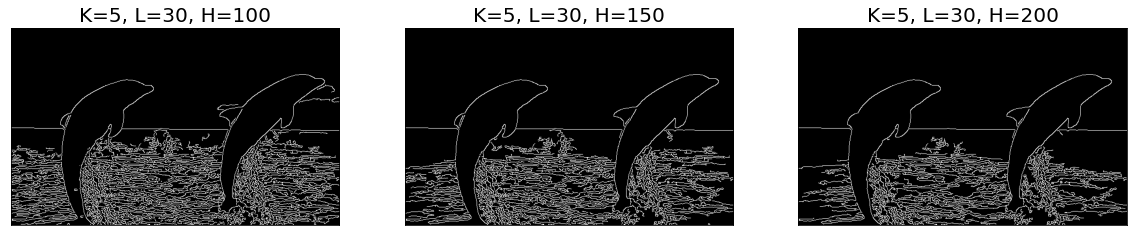

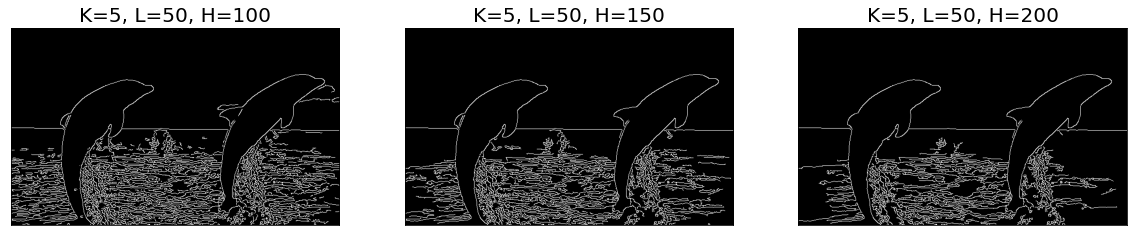

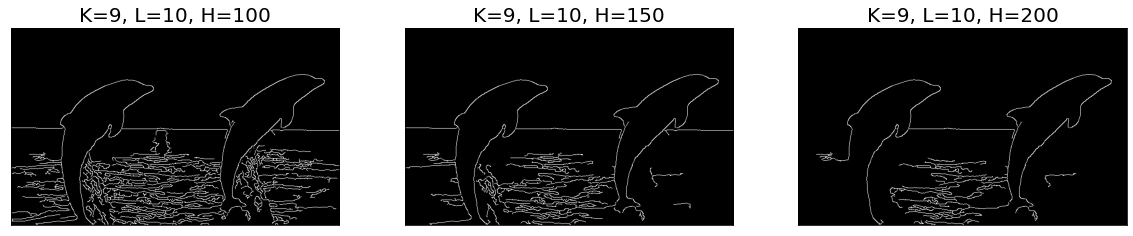

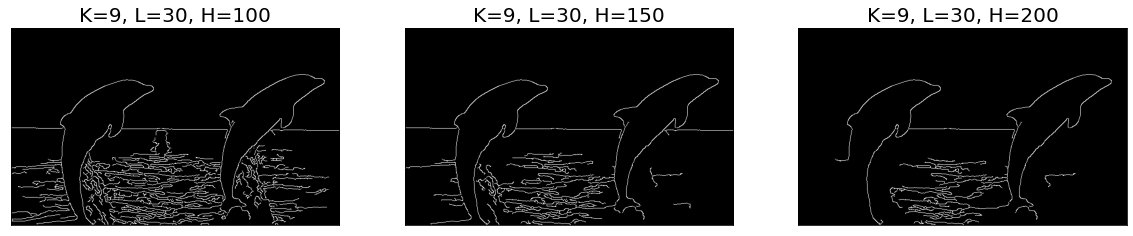

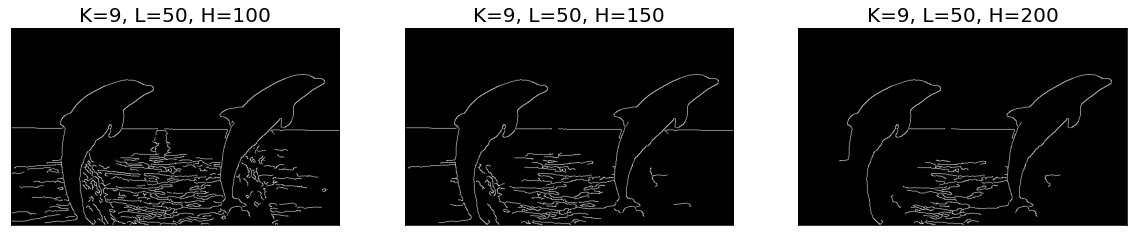

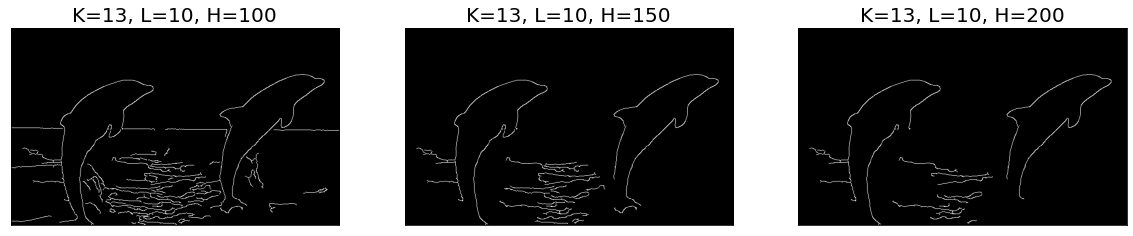

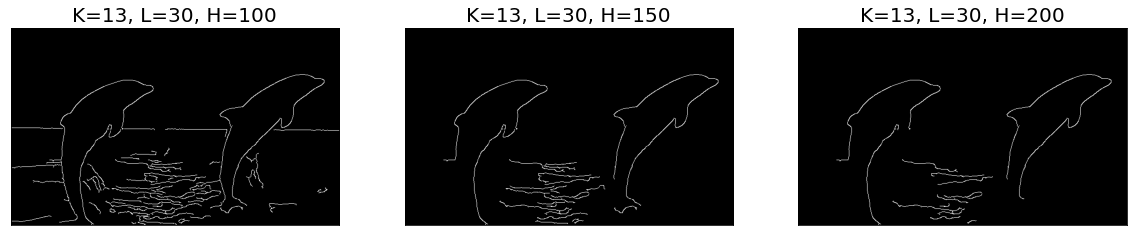

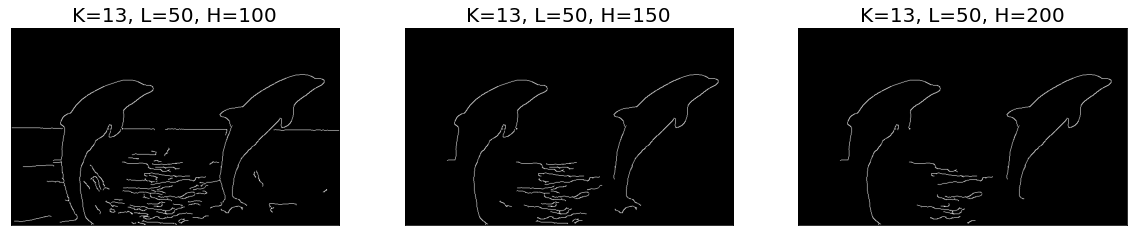

In [17]:
# Read the dolphin image
dolphin = mpimg.imread('/content/drive/My Drive/ECSE 415/dolphin.jpg')

#Convert the image into grey scale
dolphin_gray = cv2.cvtColor(dolphin, cv2.COLOR_RGB2GRAY)

#Parameters
K= [5, 9, 13]
L= [10,30,50]
H= [100,150,200]
index = 1

for k in K:
  for l in L:
    plt.figure(figsize=(20,20))
    index = 1
    for h in H:
      dolphin_gaussian = cv2.GaussianBlur(dolphin_gray,(k,k),0)
      dolphin_canny = cv2.Canny(dolphin_gaussian,l,h)
      #Display 
      plt.subplot(130+index), plt.imshow(dolphin_canny, cmap="gray")
      plt.title(f"K={k}, L={l}, H={h}",fontsize=20),plt.xticks([]),plt.yticks([])
      index += 1
    plt.show()


**Hyperparameters' Effect On Edge Detection Analysis**

As kernel size (K) increases from 5 to 13, Gaussian filtering filters more noises, and prevent detecting spurious edges caused by noise. This parameter is more effective with a higher high threshold (H) value. When the kernel size is small, the high threshold parameter causes more edge detection and it causes a "noisier" output image. As the high threshold (H) increases from 100 to 200, it filters more transition edges and causes a cleaner image. Lastly, the low threshold value (L) has the lowest impact and as it increases, it detects sharper, thus, less spurious edges. 

###Hyperparameters that Detect Only Dolphin Edges

Text(0.5, 1.0, 'K= 13, L=50, H=250')

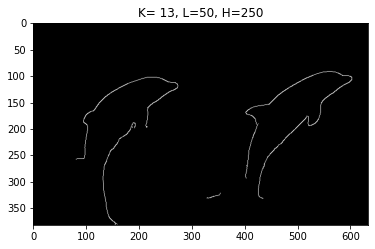

In [18]:
dolphin_gaussian_2 = cv2.GaussianBlur(dolphin_gray,(13,13),0)
dolphin_canny_2 = cv2.Canny(dolphin_gaussian_2,50,250)

plt.imshow(dolphin_canny_2, cmap='gray')
plt.title("K= 13, L=50, H=250")


The values of hyper=parameters for detecting only dolphin edges:
- Kernel size (K) = 13
- Low Threshold (L) = 50
- High Threshold (H): 250

##**5 Harris Corner Detection**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(Text(0.5, 1.0, 'Thumbnail T=1.8'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

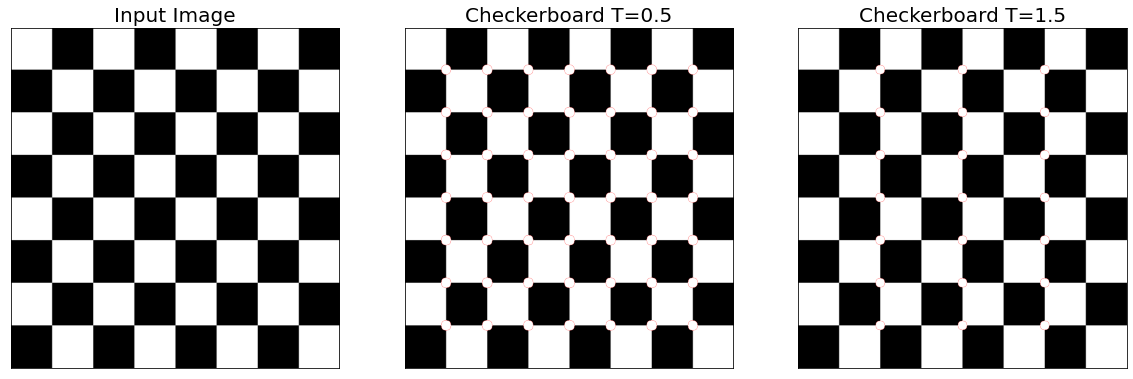

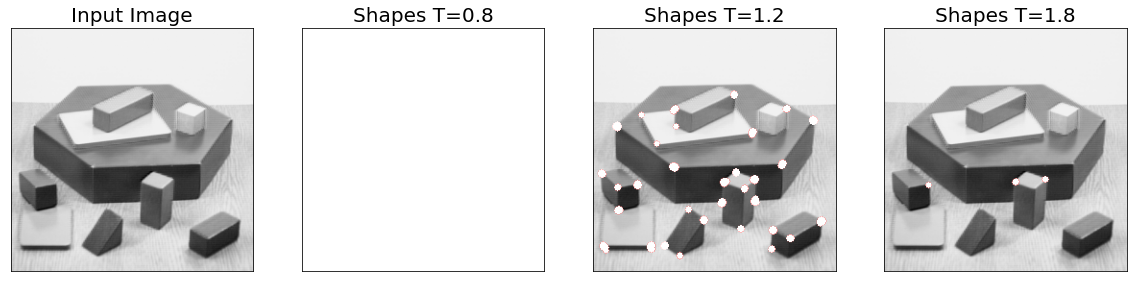

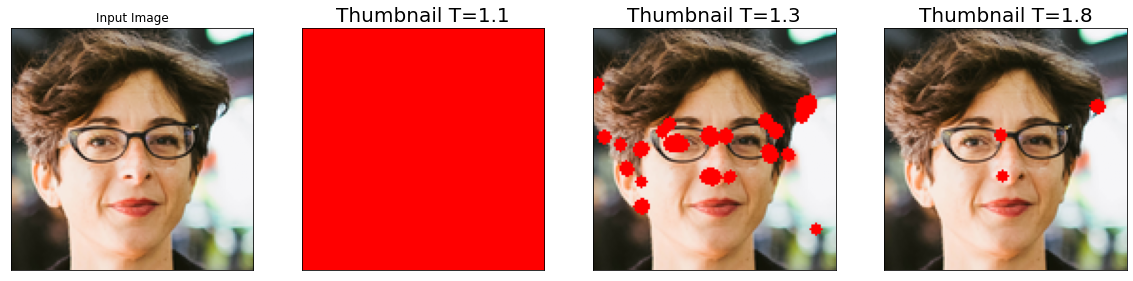

In [19]:
# Read the image
checkerboard = mpimg.imread('/content/drive/My Drive/ECSE 415/checkerboard.png')
shape = mpimg.imread('/content/drive/My Drive/ECSE 415/shapes.png')
thumbnail = mpimg.imread('/content/drive/My Drive/ECSE 415/67993.png')

def harris_corner_detector(img, threshold,circle_size):
  #Convert the image into grey scale
  img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  #Copy image for painting
  img_copy = img.copy()
  #1. Compute Image derivatives
  d_y,  d_x = np.gradient(img_gray)
  #2. Compute Square of derivatives
  i_xx = d_x * d_x
  i_yy = d_y * d_y
  i_xy = d_x * d_y
  #3. Apply Gaussian Filtering on the output of step-2
  g_xx = cv2.GaussianBlur(i_xx, (5,5),0)
  g_yy = cv2.GaussianBlur(i_yy, (5,5),0)
  g_xy = cv2.GaussianBlur(i_xy, (5,5),0)
  #4. Get Cornerness function response (Determinant(H)-kTrace(H)2), where k=0.05.
  determinant = (g_xx * g_yy) - (g_xy * g_xy)
  trace = g_xx + g_yy
  R = determinant - ( 0.05 * (trace * trace))
  #5. Perform non-maxima suppression 
  cv2.normalize(R,R,0,2,cv2.NORM_MINMAX)
  corners = np.where(R >= threshold)
  
  for pt in zip(*corners[::-1]):
    # draw filled circle on each point
    cv2.circle(img_copy, pt,circle_size, (255,0,0), -1 )
  return img_copy

# Display
##Checkerboard
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(checkerboard)
plt.title("Input Image",fontsize=20),plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(harris_corner_detector(checkerboard,0.5,10))
plt.title("Checkerboard T=0.5",fontsize=20), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(harris_corner_detector(checkerboard,1.5,10))
plt.title("Checkerboard T=1.5",fontsize=20), plt.xticks([]), plt.yticks([])
##Shapes
plt.figure(figsize=(20, 20))
plt.subplot(141), plt.imshow(shape)
plt.title("Input Image",fontsize=20), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.imshow(harris_corner_detector(shape,0.8,3))
plt.title("Shapes T=0.8",fontsize=20), plt.xticks([]), plt.yticks([])
plt.subplot(143), plt.imshow(harris_corner_detector(shape,1.2,3))
plt.title("Shapes T=1.2",fontsize=20), plt.xticks([]), plt.yticks([])
plt.subplot(144), plt.imshow(harris_corner_detector(shape,1.8,3))
plt.title("Shapes T=1.8",fontsize=20), plt.xticks([]), plt.yticks([])
##Google Face Thumbnail
plt.figure(figsize=(20, 20))
plt.subplot(141), plt.imshow(thumbnail)
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.imshow(harris_corner_detector(thumbnail,1.1,3))
plt.title("Thumbnail T=1.1",fontsize=20), plt.xticks([]), plt.yticks([])
plt.subplot(143), plt.imshow(harris_corner_detector(thumbnail,1.3,3))
plt.title("Thumbnail T=1.3",fontsize=20), plt.xticks([]), plt.yticks([])
plt.subplot(144), plt.imshow(harris_corner_detector(thumbnail,1.8,3))
plt.title("Thumbnail T=1.8",fontsize=20), plt.xticks([]), plt.yticks([])

**Effect of threshold values on detected corners**

As the threshold value increases, the number of detected edges decreases. When the threshold is too small, lots of edges are found and the indicators ( red circle in this case) cover the most of the part of the object. As the threshold increases, the number of indicators is filtered, and the indicators start to indicate more realistic edges. After some upper limit of the threshold, the edge detection results in missing corners. For this reason, the best threshold value effect cannot be summarized as "higher is better" or "less is better".

For the checkerboard image, the optimal threshold value is 0.5. A higher threshold ( T=1.5) value resulted in less corner detection.

For shapes image, when the threshold value is 0.8, the object cannot be seen because all image is covered with detected edge indicators (circles). When the threshold value is 1.8, some corners do not have detected edge indicators. So the optimal threshold should be between 0.8 and 1.8. The optimal threshold value is 1.2.

For google thumbnail, when the threshold value is 1.1, the original image cannot be seen because every pixel of the image is detected as an edge. When the threshold is 1.8, there are missing edge detector indicators. So the optimal threshold value should be between 1.1 and 1.8. The optimal threshold value is 1.3.